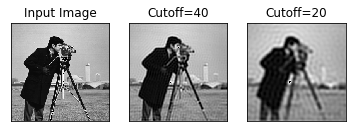

In [1]:
import cv2  
import numpy as np  
from matplotlib import pyplot as plt
img = cv2.imread('camera.png',0)
min = np.minimum(img.shape[0], img.shape[1])
img = cv2.resize(img, (min, min))
img[img >= 225] = 0
M, N = img.shape
# computing the 2-d fourier transformation of the image
fourier_image = np.fft.fft2(img)

# ideal low pass filter
u = np.array(range(0, M))
v = np.array(range(0, N))
idx = np.where(u > (M / 2))
u[idx] = u[idx] - M
idy = np.where(v > N / 2)
v[idy] = v[idy] - N
[V, U] = np.meshgrid(v, u)
D = (U ** 2 + V ** 2) ** (1 / 2)
# cutoff = 40
cutoff = [50, 40, 20, 10]

H = (D <= 40)
G = H * fourier_image
imback = np.fft.ifft2(G)
imback = np.uint8(np.real(imback))
imback[imback >= 225] = 0

H1 = (D <= 20)
G1 = H1 * fourier_image
imback1 = np.fft.ifft2(G1)
imback1 = np.uint8(np.real(imback1))
imback1[imback1 >= 225] = 0

fshift = np.fft.fftshift(fourier_image)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imback, cmap='gray')
plt.title('Cutoff=40'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(imback1, cmap='gray')
plt.title('Cutoff=20'), plt.xticks([]), plt.yticks([])
plt.show()